<a href="https://colab.research.google.com/github/raulc27/python_testes/blob/master/dados_criptomoedas_binance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vectorbt
!pip install python-binance

     |████████████████████████████████| 496 kB 6.0 MB/s 
     |████████████████████████████████| 26.5 MB 1.3 MB/s 
     |████████████████████████████████| 288 kB 70.7 MB/s 
     |████████████████████████████████| 3.4 MB 59.2 MB/s 
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
  Created wheel for vectorbt: filename=vectorbt-0.23.0-py3-none-any.whl size=538796 sha256=f381be067eec3f7c78ca067e8e1a4ad0bd9339734b9bccbb0cb5fd7a319dfae0
  Stored in directory: /root/.cache/pip/wheels/9d/f6/dc/d659a1e8ac8a6c9d19996f4ef13492d7d03f0ac545466a6d7d
Successfully built vectorbt
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2

In [2]:
import vectorbt as vbt
import plotly.express as px

In [3]:
dados = vbt.BinanceData.download('BTCBRL', start='2021-11-01', interval='1d')

0it [00:00, ?it/s]

In [5]:
dados.get()

,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open time,,,,,,,,,,
2021-11-01 00:00:00+00:00,349925.0,354936.0,340186.0,349086.0,334.97110,2021-11-01 23:59:59.999000+00:00,1.170954e+08,29574,161.84267,5.659211e+07
2021-11-02 00:00:00+00:00,349259.0,367000.0,347521.0,360415.0,349.74169,2021-11-02 23:59:59.999000+00:00,1.253169e+08,34554,205.20599,7.356288e+07
2021-11-03 00:00:00+00:00,360526.0,362179.0,343901.0,353906.0,368.35652,2021-11-03 23:59:59.999000+00:00,1.311752e+08,35564,188.26566,6.708218e+07
2021-11-04 00:00:00+00:00,354043.0,354953.0,343001.0,348246.0,388.07626,2021-11-04 23:59:59.999000+00:00,1.350672e+08,36465,182.31251,6.347443e+07
2021-11-05 00:00:00+00:00,348246.0,354452.0,339218.0,342868.0,397.77205,2021-11-05 23:59:59.999000+00:00,1.371712e+08,36708,202.86846,6.998514e+07
...,...,...,...,...,...,...,...,...,...,...
2022-01-01 00:00:00+00:00,260570.0,270044.0,260544.0,268897.0,67.21252,2022-01-01 23:59:59.999000+00:00,1.784255e+07,8662,33.52253,8.901114e+06
2022-01-02 00:00:00+00:00,268897.0,270307.0,263260.0,266630.0,77.81297,2022-01-02 23:59:59.999000+00:00,2.071998e+07,11116,40.41904,1.076472e+07
2022-01-03 00:00:00+00:00,266571.0,268100.0,260258.0,264513.0,157.22630,2022-01-03 23:59:59.999000+00:00,4.161687e+07,18507,75.21469,1.991467e+07


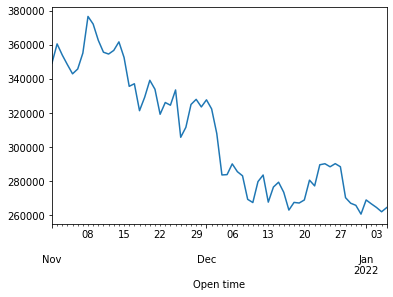

In [6]:
dados.get().Close.plot();

In [7]:
BTC_USD = vbt.BinanceData.download('BTCUSDT', start='2022-01-01', interval='1m').get()

0it [00:00, ?it/s]

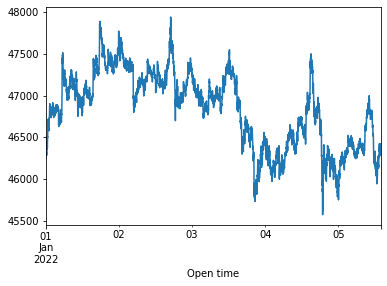

In [8]:
BTC_USD.Close.plot();

In [9]:
return_btc = BTC_USD.loc[:, 'Close'].pct_change()
fig = px.line(return_btc, title='Bitcoin Percent Change')
fig.show()

In [11]:
dados_btc_eth = vbt.BinanceData.download(['BTCBRL','ETHBRL','DOGEBRL'], start='2022-01-01', interval='1m').get();

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [12]:
dados_btc_eth[0]

symbol,BTCBRL,ETHBRL,DOGEBRL
Open time,,,
2022-01-01 00:00:00+00:00,260570.0,20744.65,0.960
2022-01-01 00:01:00+00:00,260890.0,20770.62,0.960
2022-01-01 00:02:00+00:00,261105.0,20798.27,0.964
2022-01-01 00:03:00+00:00,261445.0,20843.90,0.964
2022-01-01 00:04:00+00:00,261345.0,20807.75,0.964
...,...,...,...
2022-01-05 13:52:00+00:00,264238.0,21696.03,0.967
2022-01-05 13:53:00+00:00,264153.0,21682.65,0.968
2022-01-05 13:54:00+00:00,263995.0,21691.94,0.967


In [13]:
btc_eth_doge = dados_btc_eth[3]

In [14]:
normalizado = btc_eth_doge/btc_eth_doge.iloc[0]

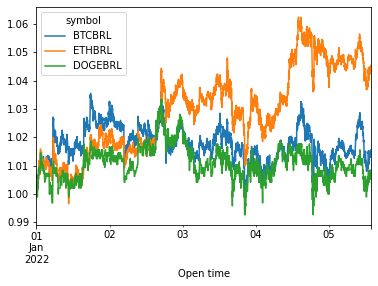

In [15]:
normalizado.plot();

In [16]:
return_btc_eth = dados_btc_eth[3].pct_change()
fig = px.line(return_btc_eth, title='bitcoin, Ethereum and Doge persistente change')
fig.show()

In [17]:
#histograma: qtde de trades das moedas
n_trades = dados_btc_eth[7]
fig = px.histogram(n_trades, title='Number of trades Histogram')
fig.show()